In [32]:
import os, sys, glob
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow
import tensorflow as tf

In [2]:
files = glob.glob('101_ObjectCategories/**/*.jpg')

In [12]:
categories = [f.split('/')[1] for f in files]
files, categories = zip(*filter(lambda (f, c): c != 'BACKGROUND_Google', zip(files, categories)))

In [22]:
def get_image(f):
  i = Image.open(f)
  i = i.resize((80,80), Image.ANTIALIAS)
  return i

images = [get_image(f) for f in files]

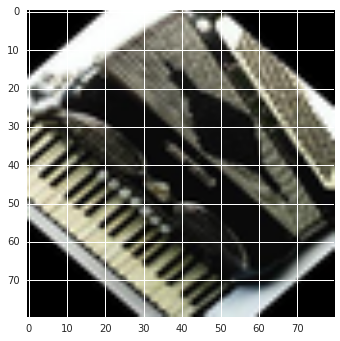

In [33]:
imshow(images[0])

In [34]:
# Run this to initialize or reset the session.
try:
  sess.close()
  tf.reset_default_graph()
except NameError:
  pass
sess = tf.InteractiveSession()

In [35]:
def weight_var(shape, name):
  return tf.get_variable(name, initializer = tf.truncated_normal(shape, stddev = 0.1))

def bias_var(shape, name):
  return tf.get_variable(name, initializer = tf.constant(0.1, shape = shape))

def conv_layer(input, filter, bias):
  return tf.nn.relu(tf.nn.conv2d(input, filter, [1,1,1,1], 'SAME') + bias)

def pool_layer(input):
  return tf.nn.max_pool(input, [1,2,2,1], [1,2,2,1], 'SAME')

def fully_connected_layer(input, weight, bias):
  return tf.nn.relu(tf.matmul(input, weight) + bias)

def fully_connected_sigmoid_layer(input, weight, bias):
  return tf.nn.sigmoid(tf.matmul(input, weight) + bias)